# Smearing functions

In [1]:
import sys,os
import numpy as np
import pylab as py
import pandas as pd
from tools.tools import load
from  matplotlib import rc
from matplotlib.colors import LogNorm
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)
import matplotlib
%matplotlib inline
from helium import HELIUM
from deuterium import DEUTERON
from scipy.integrate  import fixed_quad

## Deuteron smearing functions

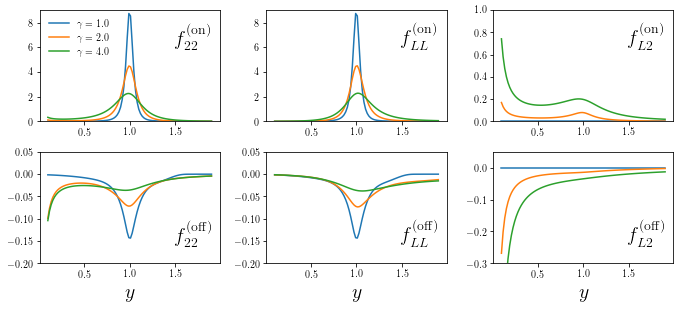

In [2]:
deuteron  = DEUTERON(path2nuctab='./grids/deuteron')
data={'y':np.linspace(0.1,1.9,100)}
#data={'y':np.linspace(0.5,0.7,100)}

for kind in ['onshell','offshell']:
    data[kind]={}
    for fXX in ['f22','fLL','fL2']:
        data[kind][fXX]={}
        for gamm in [1.0,2.0,4.0]:
            data[kind][fXX][gamm]=[deuteron.D['%s-%s'%(fXX,kind)](gamm,y)[0,0] for y in data['y']]

nrows,ncols=2,3
fig = py.figure(figsize=(ncols*3.2,nrows*2.2))
cnt=0
for k in ['onshell','offshell']:
    for fXX in ['f22','fLL','fL2']:
        cnt+=1
        ax=py.subplot(nrows,ncols,cnt) 
        for gamm in sorted(data[k][fXX]):
            ax.plot(data['y'],data[k][fXX][gamm],label='$\gamma=%0.1f$'%gamm)
        if cnt==1: ax.legend(loc=2,frameon=False)
        if 'f22' in fXX and k =='onshell': ax.set_ylim(0,9)
        if 'fLL' in fXX and k =='onshell': ax.set_ylim(0,9)    
        if 'fL2' in fXX and k =='onshell': ax.set_ylim(0,1)    
        if 'f22' in fXX and k =='offshell': ax.set_ylim(-0.2,0.05)
        if 'fLL' in fXX and k =='offshell': ax.set_ylim(-0.2,0.05)    
        if 'fL2' in fXX and k =='offshell': ax.set_ylim(-0.3,0.05)
        idx=fXX.replace('f','')
        label=r'$f^{\rm (%s)}_{%s}$'%(k.replace('shell',''),idx)
        if 'onshell' in k: ax.text(0.75,0.65,label,transform=ax.transAxes,size=20)
        if 'offshell' in k: ax.text(0.75,0.15,label,transform=ax.transAxes,size=20)
        if any([cnt==ii for ii in [4,5,6]]): ax.set_xlabel(r'$y$',size=20)
py.tight_layout()

## Helium smearing functions

In [6]:
helium={}
helium['kpsv']=HELIUM(path2nuctab='./grids/helium',group='kpsv')
helium['kpsv'].load_tables()
helium['ss']=HELIUM(path2nuctab='./grids/helium',group='ss')
helium['ss'].load_tables()

data={}
for group in ['kpsv','ss']:
    data[group]={'y':np.linspace(0.5,1.5,100)}
    for kind in ['onshell','offshell']:
        data[group][kind]={}

        for fXX in ['f22p','fLLp','fL2p','f22n','fLLn','fL2n']:
            data[group][kind][fXX]={}
            for gamm in [1.0,1.5,4.0]:
                data[group][kind][fXX][gamm]={}
                data[group][kind][fXX][gamm]['all']=np.array([helium[group].D['%s-%s'%(fXX,kind)](gamm,y)[0,0] for y in data[group]['y']])

        for fXX in ['f22p','fLLp','fL2p']:
            for gamm in [1.0,1.5,4.0]:
                data[group][kind][fXX][gamm]['pole']=np.array([helium[group].D['%s-%s-pole'%(fXX,kind)](gamm,y)[0,0] for y in data[group]['y']])      

        for fXX in ['f22p','fLLp','fL2p','f22n','fLLn','fL2n']:
            for gamm in [1.0,1.5,4.0]:
                data[group][kind][fXX][gamm]['cont']=np.array([helium[group].D['%s-%s-cont'%(fXX,kind)](gamm,y)[0,0] for y in data[group]['y']])        

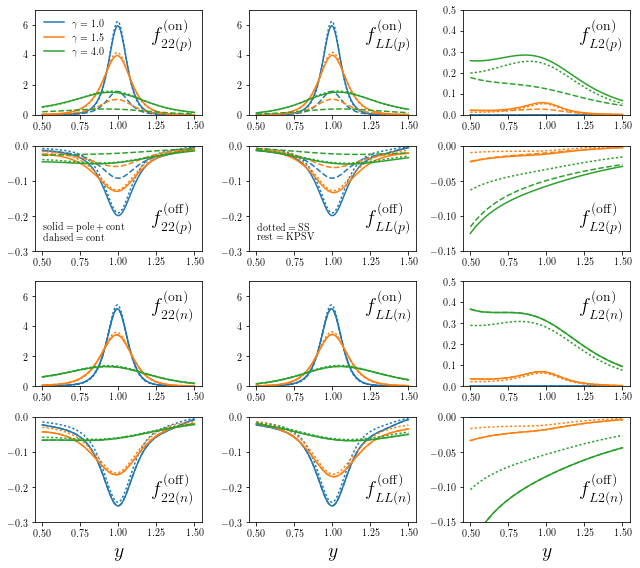

In [12]:
nrows,ncols=4,3
fig = py.figure(figsize=(ncols*3,nrows*2))
group='kpsv'
cnt=0
for N in ['p','n']:
    for k in ['onshell','offshell']:
        for fXX in ['f22'+N,'fLL'+N,'fL2'+N]:
            cnt+=1
            ax=py.subplot(nrows,ncols,cnt) 
            for gamm in sorted(data[group][k][fXX]):
                p=ax.plot(data[group]['y'],data[group][k][fXX][gamm]['all'],label='$\gamma=%0.1f$'%gamm)
                color=p[0].get_color()                
                ax.plot(data['ss']['y'],data['ss'][k][fXX][gamm]['all'],color=color,ls=':')
                ax.plot(data[group]['y'],data[group][k][fXX][gamm]['cont'],color=color,ls='--')
                    
            if 'f22' in fXX and k =='onshell': ax.set_ylim(0,7)
            if 'fLL' in fXX and k =='onshell': ax.set_ylim(0,7)    
            if 'fL2' in fXX and k =='onshell': ax.set_ylim(0,0.5)    
            if 'f22' in fXX and k =='offshell': ax.set_ylim(-0.3,0)
            if 'fLL' in fXX and k =='offshell': ax.set_ylim(-0.3,0)    
            if 'fL2' in fXX and k =='offshell': ax.set_ylim(-0.15,0)    
    
            if cnt==1: ax.legend(loc=2,frameon=False)
            if cnt==4: 
                ax.text(0.05,0.2,r'$\rm solid=pole+cont$',transform=ax.transAxes,size=10)
                ax.text(0.05,0.1,r'$\rm dahsed=cont$',transform=ax.transAxes,size=10)
            if cnt==5: 
                ax.text(0.05,0.2,r'$\rm dotted=SS$',transform=ax.transAxes,size=10)
                ax.text(0.05,0.1,r'$\rm rest=KPSV$',transform=ax.transAxes,size=10)

            idx=fXX.replace('f','').replace('p','').replace('n','')
            label=r'$f^{\rm (%s)}_{%s(%s)}$'%(k.replace('shell',''),idx,N)
            if 'on' in k: ax.text(0.7,0.65,label,transform=ax.transAxes,size=20)
            if 'off' in k: ax.text(0.7,0.2,label,transform=ax.transAxes,size=20)
            if any([cnt==ii for ii in [10,11,12]]): ax.set_xlabel(r'$y$',size=20)
py.tight_layout()

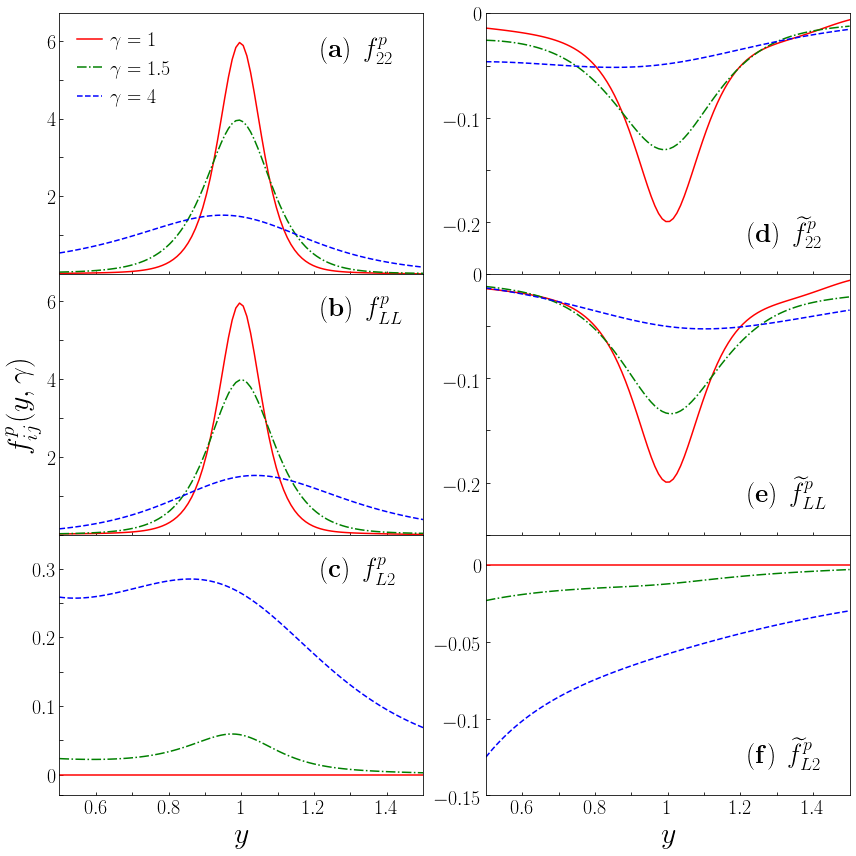

In [87]:
# Plot proton smearing functions #

nrows,ncols=3,2
fig = py.figure(figsize=(ncols*6,nrows*4))
group='kpsv'
cnt=0

ax=py.subplot(nrows,ncols,1) 
ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['f22p'][1.0]['all'],'r-',label=r'$\gamma=1$')
ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['f22p'][1.5]['all'],'g-.',label=r'$\gamma=1.5$')
ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['f22p'][4.0]['all'],'b--',label=r'$\gamma=4$')
ax.tick_params(axis='both',which='both',direction='in',labelsize=20)
ax.set_xlim(0.5,1.5)
ax.set_xticks([0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4])
ax.set_ylim(0,6.7)
ax.set_yticks([0,1,2,3,4,5,6])
ax.set_yticklabels([r'',r'',r'$2$',r'',r'$4$',r'',r'$6$'])
ax.text(0.72,0.81,r'${\bf (a)}\ \, f_{22}^p$',size=26,transform=ax.transAxes)
ax.legend(frameon=0,loc=2,fontsize=20,handletextpad=0.4,handlelength=1.25)

ax=py.subplot(nrows,ncols,2) 
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['f22p'][1.0]['all'],'r-',label=r'$\gamma=1$')
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['f22p'][1.5]['all'],'g-.',label=r'$\gamma=1.5$')
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['f22p'][4.0]['all'],'b--',label=r'$\gamma=4$')
#ax.plot(data['ss']['y'],data['ss']['offshell']['f22p'][1.0]['all'])
#ax.plot(data['ss']['y'],data['ss']['offshell']['f22p'][1.5]['all'])
#ax.plot(data['ss']['y'],data['ss']['offshell']['f22p'][4.0]['all'])
ax.tick_params(axis='both',which='both',direction='in',labelsize=20)
ax.set_xlim(0.5,1.5)
ax.set_xticks([0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4])
ax.set_ylim(-0.25,0)
ax.set_yticks([-0.25,-0.2,-0.15,-0.1,-0.05,0])
ax.set_yticklabels([r'',r'$-0.2$',r'',r'$-0.1$',r'',r'$0$'])
ax.text(0.72,0.1,r'${\bf (d)}\ \, \widetilde{f}_{22}^p$',size=26,transform=ax.transAxes)

ax=py.subplot(nrows,ncols,3) 
ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['fLLp'][1.0]['all'],'r-',label=r'$\gamma=1$')
ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['fLLp'][1.5]['all'],'g-.',label=r'$\gamma=1.5$')
ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['fLLp'][4.0]['all'],'b--',label=r'$\gamma=4$')
#ax.plot(data['ss']['y'],data['ss']['onshell']['fLLp'][1.0]['all'])
#ax.plot(data['ss']['y'],data['ss']['onshell']['fLLp'][1.5]['all'])
#ax.plot(data['ss']['y'],data['ss']['onshell']['fLLp'][4.0]['all'])
ax.tick_params(axis='both',which='both',direction='in',labelsize=20)
ax.set_xlim(0.5,1.5)
ax.set_xticks([0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4])
ax.set_ylim(0,6.7)
ax.set_yticks([0,1,2,3,4,5,6])
ax.set_yticklabels([r'',r'',r'$2$',r'',r'$4$',r'',r'$6$'])
ax.set_ylabel(r'$f_{ij}^p(y,\gamma)$',fontsize=30)
ax.text(0.72,0.81,r'${\bf (b)}\ \, f_{LL}^p$',size=26,transform=ax.transAxes)

ax=py.subplot(nrows,ncols,4) 
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['fLLp'][1.0]['all'],'r-',label=r'$\gamma=1$')
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['fLLp'][1.5]['all'],'g-.',label=r'$\gamma=1.5$')
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['fLLp'][4.0]['all'],'b--',label=r'$\gamma=4$')
#ax.plot(data['ss']['y'],data['ss']['offshell']['fLLp'][1.0]['all'])
#ax.plot(data['ss']['y'],data['ss']['offshell']['fLLp'][1.5]['all'])
#ax.plot(data['ss']['y'],data['ss']['offshell']['fLLp'][4.0]['all'])
ax.tick_params(axis='both',which='both',direction='in',labelsize=20)
ax.set_xlim(0.5,1.5)
ax.set_xticks([0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4])
ax.set_ylim(-0.25,0)
ax.set_yticks([-0.25,-0.2,-0.15,-0.1,-0.05,0])
ax.set_yticklabels([r'',r'$-0.2$',r'',r'$-0.1$',r'',r'$0$'])
ax.text(0.72,0.1,r'${\bf (e)}\ \, \widetilde{f}_{LL}^p$',size=26,transform=ax.transAxes)

ax=py.subplot(nrows,ncols,5) 
ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['fL2p'][1.0]['all'],'r-',label=r'$\gamma=1$')
ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['fL2p'][1.5]['all'],'g-.',label=r'$\gamma=1.5$')
ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['fL2p'][4.0]['all'],'b--',label=r'$\gamma=4$')
#ax.plot(data['ss']['y'],data['ss']['onshell']['fL2p'][1.0]['all'])
#ax.plot(data['ss']['y'],data['ss']['onshell']['fL2p'][1.5]['all'])
#ax.plot(data['ss']['y'],data['ss']['onshell']['fL2p'][4.0]['all'])
ax.tick_params(axis='both',which='both',direction='in',labelsize=20)
ax.set_xlim(0.5,1.5)
ax.set_xticks([0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4])
ax.set_xticklabels([r'$0.6$',r'',r'$0.8$',r'',r'$1$',r'',r'$1.2$',r'',r'$1.4$'])
ax.set_xlabel(r'$y$',fontsize=30)
ax.set_ylim(-0.03,0.35)
ax.set_yticks([-0.03,0,0.05,0.1,0.15,0.2,0.25,0.3,0.35])
ax.set_yticklabels([r'',r'$0$',r'',r'$0.1$',r'',r'$0.2$',r'',r'$0.3$',r''])
ax.text(0.72,0.81,r'${\bf (c)}\ \, f_{L2}^p$',size=26,transform=ax.transAxes)

ax=py.subplot(nrows,ncols,6) 
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['fL2p'][1.0]['all'],'r-',label=r'$\gamma=1$')
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['fL2p'][1.5]['all'],'g-.',label=r'$\gamma=1.5$')
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['fL2p'][4.0]['all'],'b--',label=r'$\gamma=4$')
#ax.plot(data['ss']['y'],data['ss']['offshell']['fL2p'][1.0]['all'])
#ax.plot(data['ss']['y'],data['ss']['offshell']['fL2p'][1.5]['all'])
#ax.plot(data['ss']['y'],data['ss']['offshell']['fL2p'][4.0]['all'])
ax.tick_params(axis='both',which='both',direction='in',labelsize=20)
ax.set_xlim(0.5,1.5)
ax.set_xticks([0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4])
ax.set_xticklabels([r'$0.6$',r'',r'$0.8$',r'',r'$1$',r'',r'$1.2$',r'',r'$1.4$'])
ax.set_xlabel(r'$y$',fontsize=30)
ax.set_ylim(-0.15,0.02)
ax.set_yticks([-0.15,-0.1,-0.05,0,0.02])
ax.set_yticklabels([r'$-0.15$',r'$-0.1$',r'$-0.05$',r'$0$',r''])
ax.text(0.72,0.1,r'${\bf (f)}\ \, \widetilde{f}_{L2}^p$',size=26,transform=ax.transAxes)

py.tight_layout()
py.subplots_adjust(wspace=None, hspace=0)
#py.subplots_adjust(wspace=0.2, hspace=0.0)
py.savefig('../fyp.pdf',bbox_inches='tight')

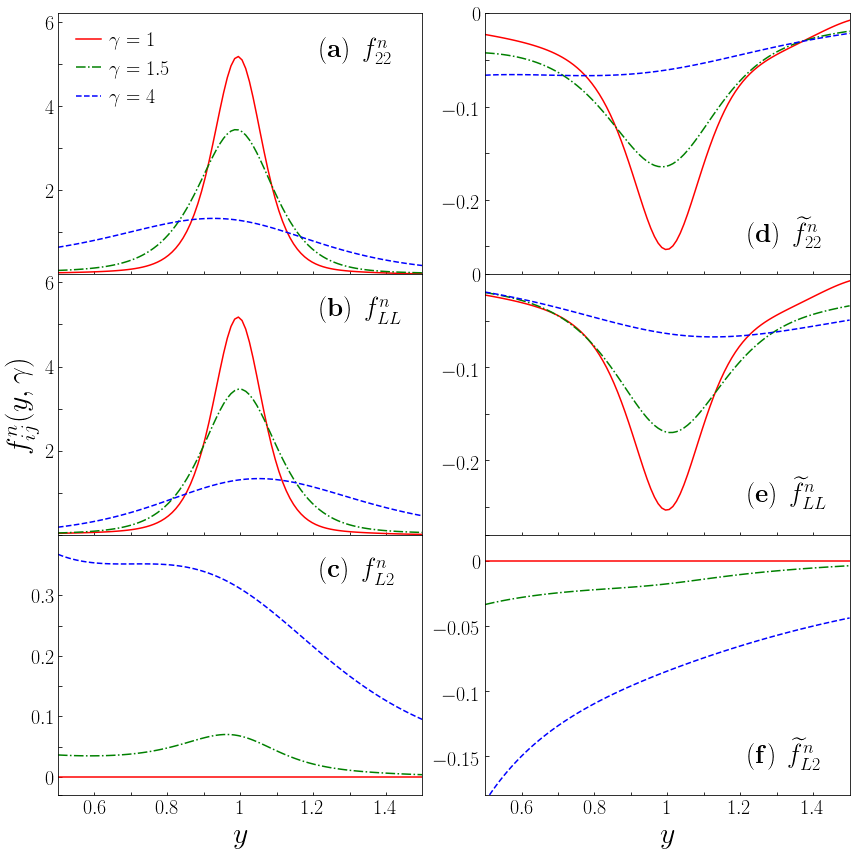

In [85]:
# Plot neutron smearing functions #

nrows,ncols=3,2
fig = py.figure(figsize=(ncols*6,nrows*4))
group='kpsv'
cnt=0

ax=py.subplot(nrows,ncols,1) 
ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['f22n'][1.0]['all'],'r-',label=r'$\gamma=1$')
ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['f22n'][1.5]['all'],'g-.',label=r'$\gamma=1.5$')
ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['f22n'][4.0]['all'],'b--',label=r'$\gamma=4$')
#ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['f22n'][1.0]['cont'])
#ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['f22n'][1.5]['cont'])
#ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['f22n'][4.0]['cont'])
#ax.plot(data['ss']['y'],data['ss']['onshell']['f22n'][1.0]['all'])
#ax.plot(data['ss']['y'],data['ss']['onshell']['f22n'][1.5]['all'])
#ax.plot(data['ss']['y'],data['ss']['onshell']['f22n'][4.0]['all'])
ax.tick_params(axis='both',which='both',direction='in',labelsize=20)
ax.set_xlim(0.5,1.5)
ax.set_xticks([0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4])
ax.set_ylim(0,6.2)
ax.set_yticks([0,1,2,3,4,5,6])
ax.set_yticklabels([r'',r'',r'$2$',r'',r'$4$',r'',r'$6$'])
ax.text(0.72,0.81,r'${\bf (a)}\ \, f_{22}^n$',size=26,transform=ax.transAxes)
ax.legend(frameon=0,loc=2,fontsize=20,handletextpad=0.4,handlelength=1.25)

ax=py.subplot(nrows,ncols,2) 
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['f22n'][1.0]['all'],'r-',label=r'$\gamma=1$')
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['f22n'][1.5]['all'],'g-.',label=r'$\gamma=1.5$')
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['f22n'][4.0]['all'],'b--',label=r'$\gamma=4$')
#ax.plot(data['ss']['y'],data['ss']['offshell']['f22n'][1.0]['all'])
#ax.plot(data['ss']['y'],data['ss']['offshell']['f22n'][1.5]['all'])
#ax.plot(data['ss']['y'],data['ss']['offshell']['f22n'][4.0]['all'])
ax.tick_params(axis='both',which='both',direction='in',labelsize=20)
ax.set_xlim(0.5,1.5)
ax.set_xticks([0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4])
ax.set_ylim(-0.28,0)
ax.set_yticks([-0.25,-0.2,-0.15,-0.1,-0.05,0])
ax.set_yticklabels([r'',r'$-0.2$',r'',r'$-0.1$',r'',r'$0$'])
ax.text(0.72,0.1,r'${\bf (d)}\ \, \widetilde{f}_{22}^n$',size=26,transform=ax.transAxes)

ax=py.subplot(nrows,ncols,3) 
ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['fLLn'][1.0]['all'],'r-',label=r'$\gamma=1$')
ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['fLLn'][1.5]['all'],'g-.',label=r'$\gamma=1.5$')
ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['fLLn'][4.0]['all'],'b--',label=r'$\gamma=4$')
#ax.plot(data['ss']['y'],data['ss']['onshell']['fLLn'][1.0]['all'])
#ax.plot(data['ss']['y'],data['ss']['onshell']['fLLn'][1.5]['all'])
#ax.plot(data['ss']['y'],data['ss']['onshell']['fLLn'][4.0]['all'])
ax.tick_params(axis='both',which='both',direction='in',labelsize=20)
ax.set_xlim(0.5,1.5)
ax.set_xticks([0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4])
ax.set_ylim(0,6.2)
ax.set_yticks([0,1,2,3,4,5,6])
ax.set_yticklabels([r'',r'',r'$2$',r'',r'$4$',r'',r'$6$'])
ax.set_ylabel(r'$f_{ij}^n(y,\gamma)$',fontsize=30)
ax.text(0.72,0.81,r'${\bf (b)}\ \, f_{LL}^n$',size=26,transform=ax.transAxes)

ax=py.subplot(nrows,ncols,4) 
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['fLLn'][1.0]['all'],'r-',label=r'$\gamma=1$')
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['fLLn'][1.5]['all'],'g-.',label=r'$\gamma=1.5$')
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['fLLn'][4.0]['all'],'b--',label=r'$\gamma=4$')
#ax.plot(data['ss']['y'],data['ss']['offshell']['fLLn'][1.0]['all'])
#ax.plot(data['ss']['y'],data['ss']['offshell']['fLLn'][1.5]['all'])
#ax.plot(data['ss']['y'],data['ss']['offshell']['fLLn'][4.0]['all'])
ax.tick_params(axis='both',which='both',direction='in',labelsize=20)
ax.set_xlim(0.5,1.5)
ax.set_xticks([0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4])
ax.set_ylim(-0.28,0)
ax.set_yticks([-0.25,-0.2,-0.15,-0.1,-0.05,0])
ax.set_yticklabels([r'',r'$-0.2$',r'',r'$-0.1$',r'',r'$0$'])
ax.text(0.72,0.1,r'${\bf (e)}\ \, \widetilde{f}_{LL}^n$',size=26,transform=ax.transAxes)

ax=py.subplot(nrows,ncols,5) 
ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['fL2n'][1.0]['all'],'r-',label=r'$\gamma=1$')
ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['fL2n'][1.5]['all'],'g-.',label=r'$\gamma=1.5$')
ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['fL2n'][4.0]['all'],'b--',label=r'$\gamma=4$')
#ax.plot(data['ss']['y'],data['ss']['onshell']['fL2n'][1.0]['all'])
#ax.plot(data['ss']['y'],data['ss']['onshell']['fL2n'][1.5]['all'])
#ax.plot(data['ss']['y'],data['ss']['onshell']['fL2n'][4.0]['all'])
ax.tick_params(axis='both',which='both',direction='in',labelsize=20)
ax.set_xlim(0.5,1.5)
ax.set_xticks([0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4])
ax.set_xticklabels([r'$0.6$',r'',r'$0.8$',r'',r'$1$',r'',r'$1.2$',r'',r'$1.4$'])
ax.set_xlabel(r'$y$',fontsize=30)
ax.set_ylim(-0.03,0.4)
ax.set_yticks([-0.03,0,0.05,0.1,0.15,0.2,0.25,0.3,0.4])
ax.set_yticklabels([r'',r'$0$',r'',r'$0.1$',r'',r'$0.2$',r'',r'$0.3$',r''])
ax.text(0.72,0.81,r'${\bf (c)}\ \, f_{L2}^n$',size=26,transform=ax.transAxes)

ax=py.subplot(nrows,ncols,6) 
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['fL2n'][1.0]['all'],'r-',label=r'$\gamma=1$')
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['fL2n'][1.5]['all'],'g-.',label=r'$\gamma=1.5$')
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['fL2n'][4.0]['all'],'b--',label=r'$\gamma=4$')
#ax.plot(data['ss']['y'],data['ss']['offshell']['fL2n'][1.0]['all'])
#ax.plot(data['ss']['y'],data['ss']['offshell']['fL2n'][1.5]['all'])
#ax.plot(data['ss']['y'],data['ss']['offshell']['fL2n'][4.0]['all'])
ax.tick_params(axis='both',which='both',direction='in',labelsize=20)
ax.set_xlim(0.5,1.5)
ax.set_xticks([0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4])
ax.set_xticklabels([r'$0.6$',r'',r'$0.8$',r'',r'$1$',r'',r'$1.2$',r'',r'$1.4$'])
ax.set_xlabel(r'$y$',fontsize=30)
ax.set_ylim(-0.18,0.02)
ax.set_yticks([-0.15,-0.1,-0.05,0,0.02])
ax.set_yticklabels([r'$-0.15$',r'$-0.1$',r'$-0.05$',r'$0$',r''])
ax.text(0.72,0.1,r'${\bf (f)}\ \, \widetilde{f}_{L2}^n$',size=26,transform=ax.transAxes)

py.tight_layout()
py.subplots_adjust(wspace=None, hspace=0)
#py.subplots_adjust(wspace=0.2, hspace=0.0)
py.savefig('../fyn.pdf',bbox_inches='tight')

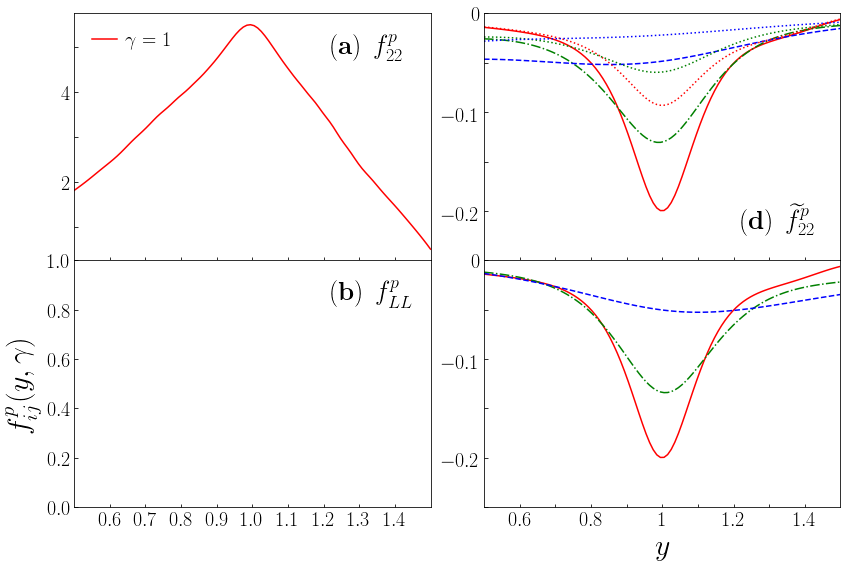

In [11]:
# Plot ratios of smearing functions #

nrows,ncols=2,2
fig = py.figure(figsize=(ncols*6,nrows*4))
group='kpsv'
cnt=0

ax=py.subplot(nrows,ncols,1) 
rat=data['ss']['onshell']['f22p'][1.0]['all']/data['kpsv']['onshell']['f22p'][1.0]['all']
ax.plot(data['kpsv']['y'],rat,'r-',label=r'$\gamma=1$')
# ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['f22p'][1.5]['all'],'g-.',label=r'$\gamma=1.5$')
# ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['f22p'][4.0]['all'],'b--',label=r'$\gamma=4$')
# ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['f22p'][1.0]['cont'],'r:',alpha=1)
# ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['f22p'][1.5]['cont'],'g:',alpha=1)
# ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['f22p'][4.0]['cont'],'b:',alpha=1)
#ax.plot(data['ss']['y'],data['ss']['onshell']['f22p'][1.0]['all'])
#ax.plot(data['ss']['y'],data['ss']['onshell']['f22p'][1.5]['all'])
#ax.plot(data['ss']['y'],data['ss']['onshell']['f22p'][4.0]['all'])
ax.tick_params(axis='both',which='both',direction='in',labelsize=20)
ax.set_xlim(0.5,1.5)
ax.set_xticks([0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4])
#ax.set_ylim(0,6.7)
#ax.set_yticks([0,1,2,3,4,5,6])
ax.set_yticklabels([r'',r'',r'$2$',r'',r'$4$',r'',r'$6$'])
ax.text(0.72,0.81,r'${\bf (a)}\ \, f_{22}^p$',size=26,transform=ax.transAxes)
ax.legend(frameon=0,loc=2,fontsize=20,handletextpad=0.4,handlelength=1.25)

ax=py.subplot(nrows,ncols,2) 
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['f22p'][1.0]['all'],'r-',label=r'$\gamma=1$')
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['f22p'][1.5]['all'],'g-.',label=r'$\gamma=1.5$')
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['f22p'][4.0]['all'],'b--',label=r'$\gamma=4$')
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['f22p'][1.0]['cont'],'r:',alpha=1)
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['f22p'][1.5]['cont'],'g:',alpha=1)
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['f22p'][4.0]['cont'],'b:',alpha=1)
#ax.plot(data['ss']['y'],data['ss']['offshell']['f22p'][1.0]['all'])
#ax.plot(data['ss']['y'],data['ss']['offshell']['f22p'][1.5]['all'])
#ax.plot(data['ss']['y'],data['ss']['offshell']['f22p'][4.0]['all'])
ax.tick_params(axis='both',which='both',direction='in',labelsize=20)
ax.set_xlim(0.5,1.5)
ax.set_xticks([0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4])
ax.set_ylim(-0.25,0)
#ax.set_yticks([-0.25,-0.2,-0.15,-0.1,-0.05,0])
ax.set_yticklabels([r'',r'$-0.2$',r'',r'$-0.1$',r'',r'$0$'])
ax.text(0.72,0.1,r'${\bf (d)}\ \, \widetilde{f}_{22}^p$',size=26,transform=ax.transAxes)

ax=py.subplot(nrows,ncols,3) 
#ax.plot(data['kpsv']['y'],data['ss']['onshell']['f22p'][1.0]['all']/data['kpsv']['onshell']['f22p'][1.0]['all'],'r-',label=r'$\gamma=1$')
#ax.plot(data['kpsv']['y'],data['ss']['onshell']['f22p'][1.5]['all']/data['kpsv']['onshell']['f22p'][1.0]['all'],'g-.',label=r'$\gamma=1.5$')
#ax.plot(data['kpsv']['y'],data['ss']['onshell']['f22p'][4.0]['all']/data['kpsv']['onshell']['f22p'][4.0]['all'],'b--',label=r'$\gamma=4$')
#ax.plot(data['ss']['y'],data['ss']['onshell']['f22p'][1.0]['all'])
#ax.plot(data['ss']['y'],data['ss']['onshell']['f22p'][1.5]['all'])
#ax.plot(data['ss']['y'],data['ss']['onshell']['f22p'][4.0]['all'])
ax.tick_params(axis='both',which='both',direction='in',labelsize=20)
ax.set_xlim(0.5,1.5)
ax.set_xticks([0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4])
#ax.set_ylim(0,6.7)
#ax.set_yticks([0,1,2,3,4,5,6])
#ax.set_yticklabels([r'',r'',r'$2$',r'',r'$4$',r'',r'$6$'])
ax.set_ylabel(r'$f_{ij}^p(y,\gamma)$',fontsize=30)
ax.text(0.72,0.81,r'${\bf (b)}\ \, f_{LL}^p$',size=26,transform=ax.transAxes)

ax=py.subplot(nrows,ncols,4) 
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['fLLp'][1.0]['all'],'r-',label=r'$\gamma=1$')
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['fLLp'][1.5]['all'],'g-.',label=r'$\gamma=1.5$')
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['fLLp'][4.0]['all'],'b--',label=r'$\gamma=4$')
#ax.plot(data['ss']['y'],data['ss']['offshell']['fLLp'][1.0]['all'])
#ax.plot(data['ss']['y'],data['ss']['offshell']['fLLp'][1.5]['all'])
#ax.plot(data['ss']['y'],data['ss']['offshell']['fLLp'][4.0]['all'])
ax.tick_params(axis='both',which='both',direction='in',labelsize=20)
ax.set_xlim(0.5,1.5)
ax.set_xticks([0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4])
ax.set_xticklabels([r'$0.6$',r'',r'$0.8$',r'',r'$1$',r'',r'$1.2$',r'',r'$1.4$'])
ax.set_xlabel(r'$y$',fontsize=30)
ax.set_ylim(-0.25,0)
ax.set_yticks([-0.25,-0.2,-0.15,-0.1,-0.05,0])
ax.set_yticklabels([r'',r'$-0.2$',r'',r'$-0.1$',r'',r'$0$'])
#ax.text(0.72,0.1,r'${\bf (e)}\ \, \widetilde{f}_{LL}^p$',size=26,transform=ax.transAxes)


py.tight_layout()
py.subplots_adjust(wspace=None, hspace=0)
#py.subplots_adjust(wspace=0.2, hspace=0.0)
#py.savefig('../fycomp.pdf',bbox_inches='tight')